In [39]:
# ИМПОРТ БИБЛИОТЕК
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

In [22]:
pd.set_option("display.max.columns", 100)

In [23]:
%matplotlib inline 
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [24]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
data = pd.read_csv(DATA_URL + "adult.data.csv") 
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
pol  = data['sex'].value_counts()
print(pol)

Male      21790
Female    10771
Name: sex, dtype: int64


In [27]:
average_female_age = data[data['sex'] == 'Female']['age'].mean()
print(average_female_age)

36.85823043357163


In [28]:
german_citizens_percentage = (data['native-country'] == 'Germany').sum() / data.shape[0] * 100
print(german_citizens_percentage)

0.42074874850281013


In [29]:
mean_std_above_50k = data[data['salary'] == '>50K']['age'].agg(['mean', 'std'])
mean_std_below_50k = data[data['salary'] == '<=50K']['age'].agg(['mean', 'std'])
print("Среднее значение и отклонение от нормы для дохода выше 50 тысяч", mean_std_above_50k)
print("Среднее значение и отклонение от нормы для дохода ниже 50 тысяч", mean_std_below_50k)

Среднее значение и отклонение от нормы для дохода выше 50 тысяч mean    44.249841
std     10.519028
Name: age, dtype: float64
Среднее значение и отклонение от нормы для дохода ниже 50 тысяч mean    36.783738
std     14.020088
Name: age, dtype: float64


In [30]:
high_income_education = data[data['salary'] == '>50K']['education'].unique() 
print("Высокий уровень образования с высоким доходом:", high_income_education)
print("Ответ Утверждение не верно. ")

Высокий уровень образования с высоким доходом: ['HS-grad' 'Masters' 'Bachelors' 'Some-college' 'Assoc-voc' 'Doctorate'
 'Prof-school' 'Assoc-acdm' '7th-8th' '12th' '10th' '11th' '9th' '5th-6th'
 '1st-4th']
Ответ Утверждение не верно. 


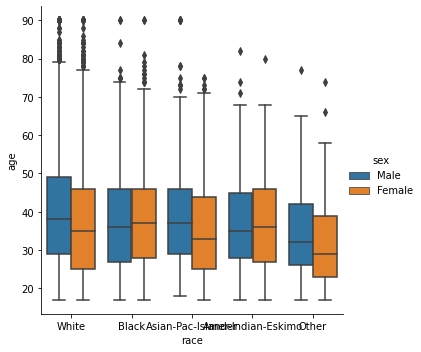

In [31]:
sns.catplot(x='race', y='age', hue='sex', kind='box', data=data)

In [32]:
max_age_american_indian = data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')]['age'].max()
print("Максимальный возраст мужчин американо-индейско-эскимосской расы", max_age_american_indian)

Максимальный возраст мужчин американо-индейско-эскимосской расы 82


In [33]:
max_age_asian_pacific = data[(data['race'] == 'Asian-Pac-Islander') & (data['sex'] == 'Female')]['age'].max()
print("Максимальный возраст представительниц азиатско-тихоокеанской расы:", max_age_asian_pacific)

Максимальный возраст представительниц азиатско-тихоокеанской расы: 75


In [34]:
data['salary'].value_counts() 

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [40]:
data['salary'] = laben.fit_transform(data['salary'])
data['salary'] = data['salary'].astype(int)
data.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [42]:
data['age'] = laben.fit_transform(data['age'])
data['age'] = data['age'].astype(int)
data.age.value_counts()

19    898
14    888
17    886
6     877
18    876
     ... 
66      6
71      3
68      3
70      1
69      1
Name: age, Length: 73, dtype: int64

In [43]:
data['education'] = laben.fit_transform(data['education'])
data['education'] = data['education'].astype(int)
data.education.value_counts()

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: education, dtype: int64

In [44]:
data['occupation'] = laben.fit_transform(data['occupation'])
data['occupation'] = data['occupation'].astype(int)
data.occupation.value_counts()

10    4140
3     4099
4     4066
1     3770
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: occupation, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
#Стандартизация, чтобы все были в единых единицах измерения
scaler = StandardScaler()
#Нормируем вес и рост и переводим в таблицу
#обучается сам нормировщик, показывая к какому масштабу все привести, но сами данные он не номирует
scaler.fit(data[['salary', 'age','education', 'occupation']].values.reshape(-1, 4))
#функция transform реально нормирует сами данные - они становятся обезличенными и имеют один масштаб
arr=scaler.transform(data[['salary', 'age','education', 'occupation']].values.reshape(-1, 4))

In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
arr

array([[-0.56319851,  0.0307785 , -0.33543693, -1.3178091 ],
       [-0.56319851,  0.83750854, -0.33543693, -0.60838662],
       [-0.56319851, -0.04256059,  0.18133163, -0.1354383 ],
       ...,
       [-0.56319851,  1.4242213 ,  0.18133163, -1.3178091 ],
       [-0.56319851, -1.21598611,  0.18133163, -1.3178091 ],
       [ 1.77557289,  0.98418673,  0.18133163, -0.60838662]])

In [47]:
model = KNeighborsClassifier(n_neighbors=3)
# n_neighbors=3 сколько ближайших соседей рассматривается для принятия решения
# в модель загружается нормированная тренеровочная выборка с массивом полов
model.fit(arr, y=df1_cut['salary'].values)

NameError: name 'KNeighborsClassifier' is not defined